<img src="https://www.universidades.com.ec/logos/original/logo-universidad-politecnica-salesiana.png" style="margin: 0 auto"/>

<h1 style="text-align:center;color: red">Análisis del proceso de vacunación en Ecuador 🇪🇨</h1>

<ul style="text-align:center;list-style:none">
    <li><strong>Autor: </strong> Bryam David Vega Moreno</li>
    <li><strong>Maestro: </strong> Diego Quisi</li>
    <li><strong>Materia: </strong> Simulación</li>
    <li><strong>Universidad: </strong> Universidad Politécnica Salesiana</li>
    <li><strong>Carrera: </strong> Ciencias de la computación</li>
</ul>

-----------------

<h2 style="color:yellowgreen">Introducción</h2>

Con la llegada de las vacunas, el proceso de vacunación del país a empezado, en este cuaderno procedemos a realizar un análisis del proceso que se ha llevado a lo largo de la fecha con la finalidad de conocer si el proceso de vacunación del país es eficiente o presenta fallas en su ejecución. De la misma manera realizaremos un modelo de regresión que nos permite predecir el número de vacunados que habra en una cierta fech. Por otro lado realizaremos una comparación con Algunos países con respecto a su proceso de vacuncación con el objetivo de tener una referencia y comparar dichos planes.

------------------------

<h2 style="color:yellowgreen">Librerias a importar</h2>

**Para lectura y análisis de datos**

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime,timedelta

**Para la realización de gráficas**

In [43]:
import altair as alt
alt.renderers.enable('altair_saver', fmts=['vega-lite', 'png'])
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

**Librerias para realizar el modelo de regresión**

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

**Librerias para métricas de calidad**

In [4]:
from sklearn.metrics import mean_squared_error

**Mejorar visualización de datos**

In [5]:
pd.options.display.float_format='{:,.2f}'.format
import warnings
warnings.simplefilter("ignore")

-----------------------

<h2 style="color:yellowgreen">Lectura de datos</h2>

En este proceso, realizamos la lectura de los datos que tenemos para poder realizar un análisis. En este caso, tenemos datos del proceso de vacuncación y de los fabricantes, a continuación mostramos la data.

In [6]:
path='./in/vacunas/{}'
df_fabricantes = pd.read_csv(path.format('fabricantes.csv'))
df_vacunas     = pd.read_csv(path.format('vacunas.csv'))

<h4 style="color:orange">Datos de fabricantes de vacuna</h4>

En este conjunto de datos tenemos las siguientes características:
* **vaccine:** fabricante
* **total:** total de vacunas del fabricante llegadas al país en una fecha dada
* **arrived_at:** Fecha en la que llegaron al país, las vacunas del fabricante

In [7]:
df_fabricantes.head(5)

,vaccine,total,arrived_at
0,Pfizer/BioNTech,8190,20/01/2021
1,Pfizer/BioNTech,16380,17/02/2021
2,Pfizer/BioNTech,17550,24/02/2021
3,Pfizer/BioNTech,31590,03/03/2021
4,Sinovac,20000,06/03/2021


<h4 style="color:orange">Datos del proceso de vacunación</h4>

En este conjunto de datos tenemos las siguientes características:
* **fecha:** Fecha de vacuncación
* **dosis_total:** suma de las personas que tienen primera dosis y personas que tienen la segunda dosis
* **primera_dosis:** número de personas que solamente tienen la primera dosis
* **segunda_dosis:** número de personas que cuentan con la segunda dosis (por lo tanto número de personas totalmente inmunizadas hasta la fecha)

In [8]:
df_vacunas.head(5)

,fecha,dosis_total,primera_dosis,segunda_dosis
0,21/01/2021,0,0,0
1,22/01/2021,108,108,0
2,27/01/2021,2982,2982,0
3,04/02/2021,6228,6228,0
4,17/02/2021,8190,6228,1962


Con estos datos procedemos a realizar una transformación con la finalidad de tener noramlizadas y estandarizados, y poder realizar un mejor análisis.

--------------------

<h2 style="color:yellowgreen">Transformación de datos</h2>

In [9]:
def _transform_data_date(df,column_name):
    df[column_name]= pd.to_datetime(df[column_name],format='%d/%m/%Y')
    return df   

def _obtain_days_from_date(df,column_name,start_date):
    format_date = '%Y-%m-%d'
    df['day']=df[column_name].apply(lambda x : (x - datetime.strptime(start_date, format_date)).days +1)
    return df

def _save_data(df,filename):
    df.to_csv('./in/procesado/{}'.format(filename))

Para proceder a realizar la transforamción de los datos siempre es bueno realizar una copia del dataset original, con la finalidad de no modificar el conjunto de datos de origin y usar una copia para transformarlo y realizar un análisis con ello

In [10]:
df_copy_vacunas     = df_vacunas.copy(deep=True)
df_copy_fabricantes = df_fabricantes.copy(deep=True) 

Una vez realizado las copias de los conjunto de datos, procedemos a transformar la data y a guardarla en un nuevo conjunto de datos procesados.

<h4 style="color:orange">Transformación para los datos de vacunación</h4>

In [11]:
df_copy_vacunas = _transform_data_date(df_copy_vacunas,'fecha')
df_copy_vacunas = _obtain_days_from_date(df_copy_vacunas,'fecha','2021-01-01')
_save_data(df_copy_vacunas,'vacunas.csv')

In [12]:
df_copy_vacunas.head()

,fecha,dosis_total,primera_dosis,segunda_dosis,day
0,2021-01-21,0,0,0,21
1,2021-01-22,108,108,0,22
2,2021-01-27,2982,2982,0,27
3,2021-02-04,6228,6228,0,35
4,2021-02-17,8190,6228,1962,48


<h4 style="color:orange">Transformación para los datos de fabricantes</h4>

In [13]:
df_copy_fabricantes = _transform_data_date(df_copy_fabricantes,'arrived_at')
df_copy_fabricantes = _obtain_days_from_date(df_copy_fabricantes,'arrived_at','2021-01-01')
_save_data(df_copy_fabricantes,'fabricantes.csv')

In [14]:
df_copy_fabricantes

,vaccine,total,arrived_at,day
0,Pfizer/BioNTech,8190,2021-01-20,20
1,Pfizer/BioNTech,16380,2021-02-17,48
2,Pfizer/BioNTech,17550,2021-02-24,55
3,Pfizer/BioNTech,31590,2021-03-03,62
4,Sinovac,20000,2021-03-06,65
5,Pfizer/BioNTech,73710,2021-03-10,69
6,Oxford/AstraZeneca,84000,2021-03-17,76
7,Pfizer/BioNTech,62010,2021-03-17,76
8,Pfizer/BioNTech,65520,2021-03-24,83
9,Pfizer/BioNTech,66690,2021-03-31,90


Con estos datos transformados, procedemos a realizar un análisis con la finalidad de ver como se estan comportando nuestros datos y poder sacar algunas opiniones al respecto

------------------------------------

<h2 style="color:yellowgreen">Análisis Exploratorio</h2>

<h3 style="color:darkred"> Análisis a los datos de fabricantes</h3>

<h4 style="color:orange">Vacunas adquiridas por Ecuador</h4>

Lo primero que procedemos a ver, es que tanto se han estado adquiriendo vacunas a lo largo del tiempo, por ello, lo que procedemos a hacer es agrupar nuestro conjunto de datos por fabricante y fecha de arrivo para visualizar de una mejor forma como cada fabricante ha ido entregando las vacunas y ademas de ello realizaremos un gráfico con la finalidad de apreciar de mejor manera los datos.

In [15]:
df_vaccines=df_copy_fabricantes.groupby(['vaccine',pd.Grouper(key='arrived_at',freq='M')])[['total']].sum()
df_vaccines

total
vaccine            arrived_at         
Oxford/AstraZeneca 2021-03-31    84000
                   2021-04-30   336000
Pfizer/BioNTech    2021-01-31     8190
                   2021-02-28    33930
                   2021-03-31   299520
                   2021-04-30   217620
                   2021-05-31   100620
Sinovac            2021-03-31    20000
                   2021-04-30  1000000

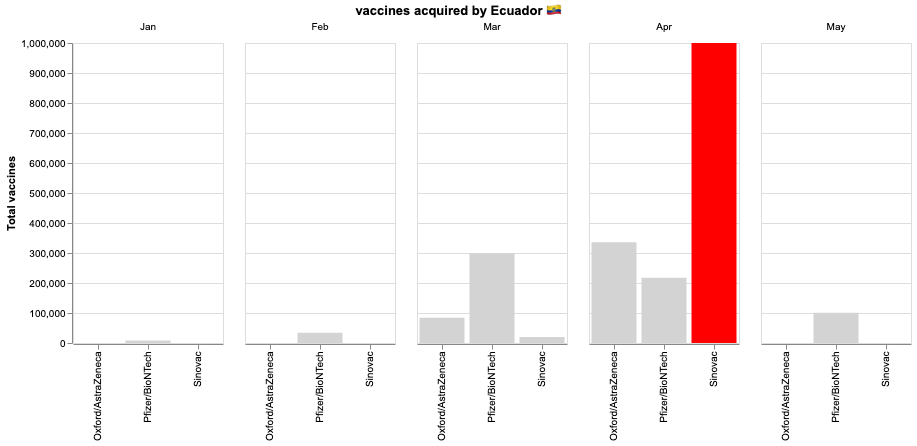

In [16]:
df_vaccines.reset_index(inplace=True)
figure=alt.Chart(df_vaccines).mark_bar().encode(
        x=alt.X('vaccine:O',title=''),
        y=alt.Y('total:Q',title='Total vaccines'),
        color=alt.condition(
            alt.datum.total == 1000000,
            alt.value('red'),    
            alt.value('lightgrey')
         ),
        column=alt.Column('month(arrived_at):N',title='')
    ).properties(title='vaccines acquired by Ecuador 🇪🇨',width=150
    ).configure_title(
        anchor='middle'
    )
figure.save('figures/vaccines.png',sscale_factor=2.0)
figure

Como podemos notar, a lo largo de estos meses lo cuales son desde Enero a Mayo, hemos realizado la compra a 3 fabricantes principalmente, los cuales son **Pfizer (Estados Unidos),Oxford(Inglaterra) y Sinovac (China)**. A lo largo de los meses, desde que se empezo a pedir las vacunas, notamos que la vacuna Pfizer fue la primera en solicitarse y la que se sigue adquiriendo en el transcurso de los meses, a diferencia de las vacunas de oxford y Sinovac que empezarón a ser adquiridas a inicios del mes de Febrero, pero dejarón de ser adquiridas en el mes de mayo según los datos obtenidos. Ademas de ello, podemos ver que hay una adquisición de vacunas bastante grande para el fabricante Sinovac en el mes de Abril,con un total de 1 millon de vacunas adquiridas.

<h4 style="color:orange">Vacunas totales adquiridas por fabricante</h4>

Como vimos en el anterior gráfico, se pudo notar la compra de vacunas a lo largo de los meses, a primera vista, podemos notar que las vacunas que el Ecuador a adquirido es Sinovac aunque no haya sido adquirida desde inicios del año, la gran adquisición del mes de Abril lo hace ser la vacuna más adquirida del Ecuador. Sin embargo, procedemos a hacer un consolidado con la finalidad de ver el total de vacunas por fabricante.

In [17]:
df_fabricants=df_copy_fabricantes.groupby(['vaccine'])['total'].agg([np.sum])
df_fabricants

,sum
vaccine,
Oxford/AstraZeneca,420000
Pfizer/BioNTech,659880
Sinovac,1020000


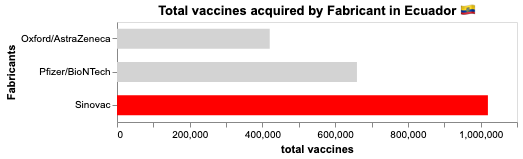

In [18]:
df_fabricants.reset_index(inplace=True)
figure_one = alt.Chart(df_fabricants).mark_bar(size=20).encode(
        x=alt.X('sum:Q',title='total vaccines'),
        y=alt.Y('vaccine:O',title='Fabricants'),
        color=alt.condition(
            alt.datum.vaccine == 'Sinovac',
            alt.value('red'),    
            alt.value('lightgrey')
            )
        ).properties(
            height=100,
            title='Total vaccines acquired by Fabricant in Ecuador 🇪🇨'
        ).configure_axis(
            grid=False
        )
figure_one.save('figures/vaccines_fabricant.png',scale_factor=2.0)
figure_one

Como podemos notar en el gráfico, nos podemos dar cuenta que Ecuador  cuenta en su mayoria, vacunas del fabricante chino Sinovac y esto es gracias a lo adquirido el mes de abril, seguido de ello tenemos al fabricante Sinovac como el segundo proveedor de vacunas y por último tenemos al fabricante Oxford con sus vacunas.

<h4 style="color:orange">Porcentaje de vacunas adquiridas en Ecuador por fabricante</h4>

Si bien es bueno ver el número de vacunas que se adquirierón por fabricante, también es importante ver el porcentaje que representa cada fabricante con respecto del total de vacunas adquiridas, para ello, obtenemos el porcentaje de cada fabricante y realizamos un gráfico de pastel.

In [19]:
df_percentage=df_copy_fabricantes.groupby(['vaccine'])[['total']].sum()
df_percentage['percentage']=(df_percentage['total']/df_percentage['total'].sum())*100
df_percentage

,total,percentage
vaccine,,
Oxford/AstraZeneca,420000,20.00
Pfizer/BioNTech,659880,31.42
Sinovac,1020000,48.57


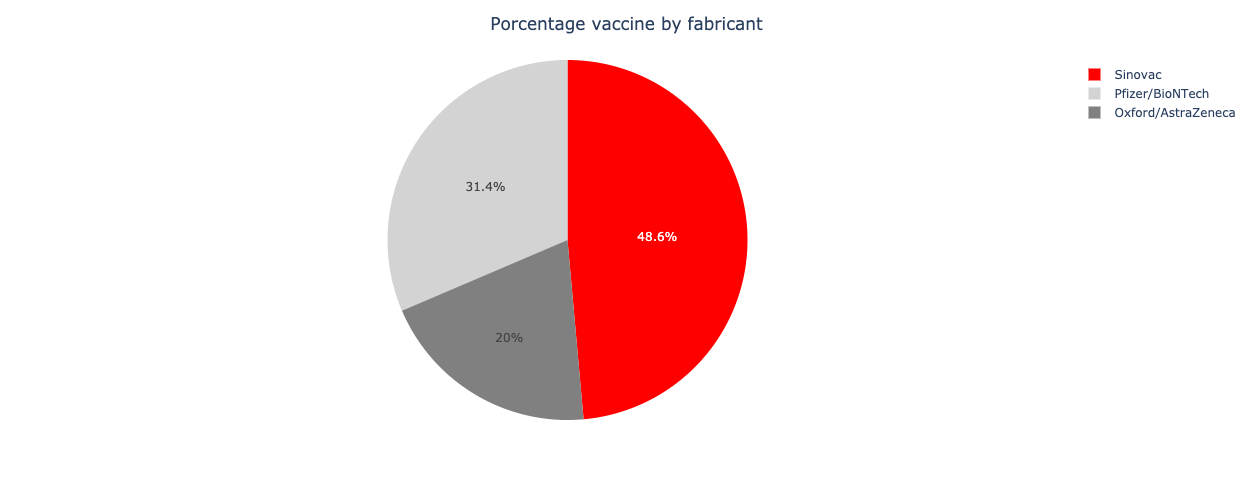

In [20]:
df_percentage.reset_index(inplace=True)
fig = px.pie(df_percentage, values="percentage",
             names="vaccine", 
             color_discrete_sequence=['red','lightgrey','grey'],width=1000,height=500)
fig.update_layout(title_text='Porcentage vaccine by fabricant', title_x=0.5)

Con la gráfica presentada, podemos notar que el fabricante ciho Sinovac ocupa e 48.6% de las vacunas de Ecuador, mientras que el 31.4% lo tiene la empresa Pfizer y un 20% el fabricante Oxford. Esto solamente nos indica cual es el fabricante que más vacunas han arrivado en el Ecuador a nivel de porcentaje, nos da una idea más claro la representación de cada fabricante en el país.Sin embargo, deseamos saber cuantas personas podran ser vacunadas con este total de vacunas compradas

In [21]:
print('posible porcentaje de vacunación de la población ecuatoriana con primera dosis o con ambas dosis: {:.2f} %'.format(((df_percentage['total']/17370000)*100).sum()))
print('posible porcentaje de vacunación de la población ecuatoriana con ambas dosis: {:.2f} %'.format(((df_percentage['total']/17370000)*100).sum()/2))

posible porcentaje de vacunación de la población ecuatoriana con primera dosis o con ambas dosis: 12.09 %
posible porcentaje de vacunación de la población ecuatoriana con ambas dosis: 6.04 %


Con ello en mente, con un total de **2,099** millones de vacunas adquiridas hasta la fecha, podriamos decir que el **12,09%** de la población sera vacunada con el total de vacunas adquiridas. Este porcentaje representa el total de personas vacunadas o con la primera dosis o con la segunda dosis, ya que este porcentaje no significa que el 12,08% estara totalmente vacunada con las dos dosis. Si deseamos nosotros saber el porcentaje de personas que estaran vacunadas con las dos dosis podriamos simplemente dividir el porcentaje a la mitad con la finalidad de suponer que ese porcentaje representa a la población con ambas dosis, con ello en mente, tenemos que un **6,04%** de la población estara totalmente vacunada con ambas dosis.

<h3 style="color:darkred"> Análisis a los datos de vacunas</h3>

<h4 style="color:orange">Gente vacunada en el Ecuador</h4>

Primero procedemos a hacer una gráfica general de como esta el proceso de vacunación en Ecuador, simplemente viendo como a avanzado el número de vacunados en el Ecuador tomando en cuenta los vacunados con primera dosis y los vacunados con la segunda dosis, con ellos tenemos los siguientes resultados:

In [22]:
df_vaccines_day= df_copy_vacunas[['fecha','primera_dosis','segunda_dosis']]
df_vaccines_day.head()

,fecha,primera_dosis,segunda_dosis
0,2021-01-21,0,0
1,2021-01-22,108,0
2,2021-01-27,2982,0
3,2021-02-04,6228,0
4,2021-02-17,6228,1962


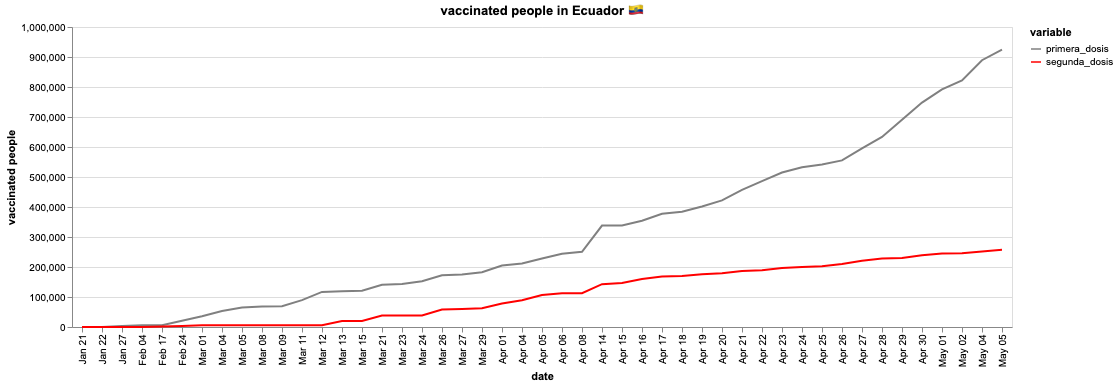

In [23]:
alt.Chart(df_vaccines_day.melt('fecha')).mark_line().encode(
    x=alt.X('monthdate(fecha):O',title='date'),
    y=alt.Y('value:Q',title='vaccinated people'),
    color=alt.Color('variable',scale=alt.Scale(domain=['primera_dosis','segunda_dosis'],range=['grey','red']))
).properties(title='vaccinated people in Ecuador 🇪🇨')

Como podemos apreciar en la gráfica presentada, podemos notar que el proceso de vacunación ha sido creciente, sin embargo, podemos notar que en el mes de abril se aumenta de cierta manera el número de personas vacunadas y esto debido al número de vacunas que llegarón en ese mes, sin embargo, podemos también notar que el proceso de personas vacunadas con la segunda dosis es pequeño y falta mucho para llegar a inmmunizar a la población Ecuatoriana. Aunque este gráfico muestra como se ha ido realizando la vacunación día día, se muestra un gráfico de manera creciente ya que por obvias razones cada día se vacunan más personas, sin embargo, sería mucho mejor ver la diferencia de vacunación que hubo entre meses, de esa manera podremos notar más facilmente en que mes se realizaron mas vacunaciones

<h4 style="color:orange">Gente vacunada en el Ecuador por Mes</h4>

Haciendo un análisis mad profundo, es decir, tomando en cuenta la diferencia de vacunación que hubo entre meses podremos notar con mayor facilidad en que mes se realizarón más vacunaciones y sacar conclusiones al respecto.

In [24]:
df_vaccine      = df_copy_vacunas.groupby(pd.Grouper(key='fecha',freq='M'))[['primera_dosis','segunda_dosis']].max()
df_vaccine_diff = df_vaccine.diff()
df_vaccine_diff = df_vaccine_diff.fillna(df_vaccine.head(1).to_dict())
df_vaccine_diff.head()

,primera_dosis,segunda_dosis
fecha,,
2021-01-31,"2,982.00",0.00
2021-02-28,"17,802.00","3,708.00"
2021-03-31,"161,545.00","58,829.00"
2021-04-30,"565,692.00","176,894.00"
2021-05-31,"176,518.00","18,115.00"


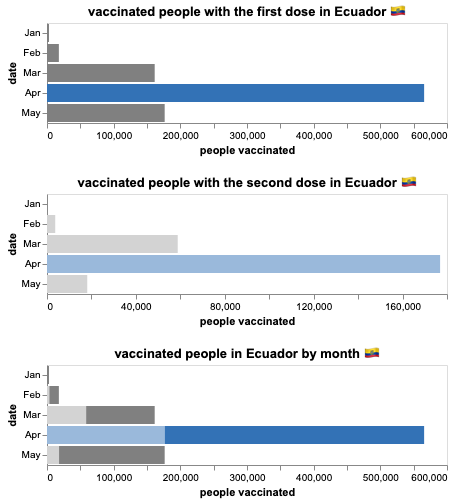

In [25]:
df_vaccine_diff.reset_index(inplace=True)
fig_1=alt.Chart(df_vaccine_diff).mark_bar().encode(
    x=alt.X('primera_dosis:Q',title='people vaccinated'),
    y=alt.Y('month(fecha):O',title='date'),
    color=alt.condition(
            alt.datum.primera_dosis == 565692.00,
            alt.value('rgb(51,114,182)'),    
            alt.value('grey')
            ),
).properties(
            height=100,
            title='vaccinated people with the first dose in Ecuador 🇪🇨'
)
fig_2=alt.Chart(df_vaccine_diff).mark_bar().encode(
    x=alt.X('segunda_dosis:Q',title='people vaccinated'),
    y=alt.Y('month(fecha):O',title='date'),
    color=alt.condition(
            alt.datum.segunda_dosis == 176894.00,
            alt.value('rgb(154,185,219)'),    
            alt.value('lightgrey')
            )
).properties(
            height=100,
            title='vaccinated people with the second dose in Ecuador 🇪🇨'
)
(fig_1&fig_2&(fig_1+fig_2).properties(title='vaccinated people in Ecuador by month 🇪🇨')).configure_axis(grid=False)

 En esta gráfica de barras, presentamos tres gráficos, la primera contiene información de las personas vacunadas con la primera dosis, la segunda contiene información de las personas vacunadas con la segunda dosis, y el ultimo es un consolidado del primer y segundo gráfico.Como podemos apreciar en la gráfica, tanto las personas vacundas con la primera dosis y personas vacunadas con la segunda dosis tienen su mayoría en el mes de Abril, por la misma razón que hemos explicado durante este reporte y es que en el mes de Abril se han adquirido la mayoría de vacunas en este caso Sinovac. Sin embargo vemos como en el mes de mayo se redujo en gran medida el número de personas vacunadas y esto es debido a que seguramente las vacunas Sinovac estan por acabarse y al solamente contar con vacunas Pfizer según lo visto en el análisis de datos de fabricantes, no hay como vacunar a más población.

<h4 style="color:orange">Porcentaje de personas vacunadas en Ecuador</h4>

Si bien, conocer el número de personas vacunadas en el Ecuador es bueno puesto que sabemos el número actual de personas que han recibido la vacuna, es mucho mejor conocer a nivel de porcentaje la cantidad de personas vacunadas, con la finalidad de apreciar mejor con respecto a la población total cuanto falta para que la gente se vacune totalmente.

In [26]:
df_vaccine_percentage=df_copy_vacunas.iloc[df_copy_vacunas.shape[0]-1].to_dict()
dict_vaccine_percentage={ 'index': ['first dose','second dose','not vaccinated'],
                          'percentage':[df_vaccine_percentage['primera_dosis']/17370000*100,
                                       df_vaccine_percentage['segunda_dosis']/17370000*100,
                                       (17370000-df_vaccine_percentage['dosis_total'])/17370000*100]}
df_vaccine_percentage_ec=pd.DataFrame(dict_vaccine_percentage)
df_vaccine_percentage_ec

,index,percentage
0,first dose,5.32
1,second dose,1.48
2,not vaccinated,93.19


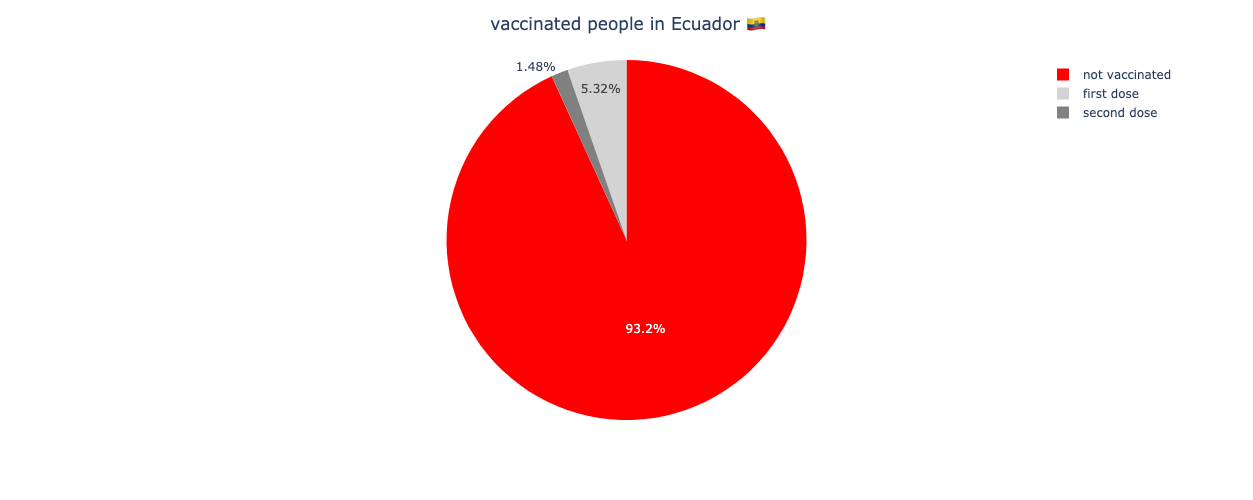

In [27]:
fig_one = px.pie(df_vaccine_percentage_ec, values="percentage",
             names="index", 
             color_discrete_sequence=['red','lightgrey','grey'],width=1000,height=500)
fig_one.update_layout(title_text='vaccinated people in Ecuador 🇪🇨', title_x=0.5)

Como podemos notar en la gráfica de pastel, el proceso de vacunación de Ecuador es muy deficiente puesto que solamente el **6.8%** de la población Ecuatoriana ha sido vacunada, mientras que el **93.2%** de la población no ha sido vacunada, esto presenta un caso grave del país, ya que la inficiencia del gobierno hace que no se consigan la cantidad de vacunas necesarias y no se pueda vacunar de manera más rápida a la población.

<h3 style="color:darkred"> Comparación del proceso de vacunación de Chile contra Ecuador</h3>

En este caso, procedemos a realizar un análisis al proceso de vacunación de Chile, con la finalidad de ver que tan eficiente es su proceso con respecto al proceso Ecuatoriano.

In [28]:
df_vacunas_chile = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto76/vacunacion_t.csv')
df_vacunas_chile = df_vacunas_chile[['Region','Total','Total.1']]
df_vacunas_chile = df_vacunas_chile.drop(0,axis=0)
df_vacunas_chile.columns = ['fecha','primera_dosis','segunda_dosis']
df_vacunas_chile[['primera_dosis','segunda_dosis']] = df_vacunas_chile[['primera_dosis','segunda_dosis']].astype(np.float)
df_vacunas_chile['fecha']= pd.to_datetime(df_vacunas_chile['fecha'])
df_vacunas_chile['dosis_total'] = df_vacunas_chile['primera_dosis']+df_vacunas_chile['segunda_dosis']

In [29]:
df_vacunas_chile.head()

,fecha,primera_dosis,segunda_dosis,dosis_total
1,2020-12-24,420.00,0.00,420.00
2,2020-12-25,"5,198.00",0.00,"5,198.00"
3,2020-12-26,"8,338.00",0.00,"8,338.00"
4,2020-12-27,"8,649.00",0.00,"8,649.00"
5,2020-12-28,"8,649.00",0.00,"8,649.00"


<h4 style="color:orange">Gente vacunada en Chile</h4>

Lo primero que procedemos a hacer es realizar un pequeño gráfico que muestro como se ha ido realizando el proceso de vacunación y como ha ido aumentando el mismo con respecto al tiempo.

In [30]:
df_vaccine_chile = df_vacunas_chile[['fecha','primera_dosis','segunda_dosis']]
df_vaccine_chile = df_vaccine_chile.groupby(pd.Grouper(key='fecha',freq='W'))[['primera_dosis','segunda_dosis']].max()
df_vaccine_chile.head()

,primera_dosis,segunda_dosis
fecha,,
2020-12-27,"8,649.00",0.00
2021-01-03,"8,649.00",0.00
2021-01-10,"10,702.00",0.00
2021-01-17,"13,801.00","8,366.00"
2021-01-24,"56,964.00","8,368.00"


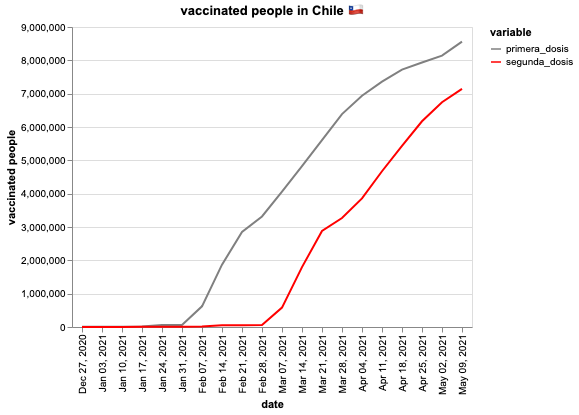

In [31]:
df_vaccine_chile.reset_index(inplace=True)
alt.Chart(df_vaccine_chile.melt('fecha')).mark_line().encode(
    x=alt.X('yearmonthdate(fecha):O',title='date'),
    y=alt.Y('value:Q',title='vaccinated people'),
    color=alt.Color('variable',scale=alt.Scale(domain=['primera_dosis','segunda_dosis'],range=['grey','red']))
).properties(title='vaccinated people in Chile 🇨🇱')

Como podemos darnos cuenta en la gráfico, Chile, empezo a realizar el proceso de vacunación desde Diciembre del 2020, a diferencia de ecuador que empezo a Enero del 2021, ademas de ello nos damos cuenta que hasta mayo se han obtenido un gran conjunto de personas vacunadas y a su vez vemos que la diferencia entre personas vacunas con la primera dosis y otras con la segunda dosis no es muy grande a diferencia de la Ecuatoriana

<h4 style="color:orange">Gente vacunada en Chile por Mes</h4>

De la misma manera como hicimos con Ecuador, procedemos a realizar un análisis del proceso de vacunación de Chile por cada més, con la finalidad de ver si la diferencia de vacunación entre mes es alta o corta

In [32]:
df_vaccine      = df_vacunas_chile.groupby(pd.Grouper(key='fecha',freq='M'))[['primera_dosis','segunda_dosis']].max()
df_vaccine_diff = df_vaccine.diff()
df_vaccine_diff = df_vaccine_diff.fillna(df_vaccine.head(1).to_dict())
df_vaccine_diff.head()

,primera_dosis,segunda_dosis
fecha,,
2020-12-31,"8,649.00",0.00
2021-01-31,"48,355.00","10,405.00"
2021-02-28,"3,259,273.00","45,885.00"
2021-03-31,"3,481,471.00","3,624,932.00"
2021-04-30,"1,342,597.00","3,059,197.00"


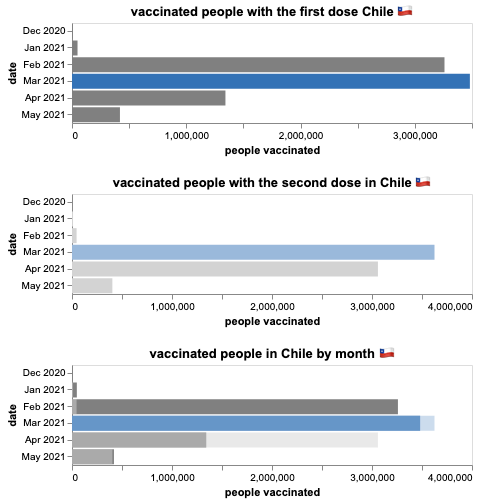

In [33]:
df_vaccine_diff.reset_index(inplace=True)
fig_1=alt.Chart(df_vaccine_diff).mark_bar().encode(
    x=alt.X('primera_dosis:Q',title='people vaccinated'),
    y=alt.Y('yearmonth(fecha):O',title='date'),
    color=alt.condition(
            alt.datum.primera_dosis == 3481471.00,
            alt.value('rgb(51,114,182)'),    
            alt.value('grey')
            ),
).properties(
            height=100,
            title='vaccinated people with the first dose Chile 🇨🇱'
)
fig_2=alt.Chart(df_vaccine_diff).mark_bar().encode(
    x=alt.X('segunda_dosis:Q',title='people vaccinated'),
    y=alt.Y('yearmonth(fecha):O',title='date'),
    color=alt.condition(
            alt.datum.segunda_dosis == 3624932.00,
            alt.value('rgb(154,185,219)'),    
            alt.value('lightgrey')
            )
).properties(
            height=100,
            title='vaccinated people with the second dose in Chile 🇨🇱'
)
(fig_1&fig_2&(fig_1+fig_2.encode(opacity=alt.value(0.5))).properties(title='vaccinated people in Chile by month 🇨🇱')).configure_axis(grid=False)

Como podemos darnos cuenta en la gráfica presentada, podemos notar un caso muy interesante y es que en el mes de Marzo, el proceso de vacunación para las personas con segunda dosis es superior a la vacunación para las personas que tienen solamente la primera dosis, de esa manera aseguran que más población este totalmente inmunizada, de la misma manera vemos que en el mes de mayo sucede algo similar, por otro lado, en Ecuador, esto es muy diferente y vimos que los vacunados con primera dosis son más.

<h4 style="color:orange">Porcentaje de personas vacunadas en Chile</h4>

Como habiamos dicho anteriormente, no hay mejor forma de analizar el proceos de vacunación si no conociendo el porcentaje de personas vacunadas en el país, en este caso podemos obtener el siguiente resultado:

In [34]:
df_vaccine_percentage=df_vacunas_chile.iloc[df_vacunas_chile.shape[0]-1].to_dict()
dict_vaccine_percentage={ 'index': ['first dose','second dose','not vaccinated'],
                          'percentage':[df_vaccine_percentage['primera_dosis']/18950000*100,
                                       df_vaccine_percentage['segunda_dosis']/18950000*100,
                                       (18950000-df_vaccine_percentage['dosis_total'])/18950000*100]}
df_vaccine_percentage_ch=pd.DataFrame(dict_vaccine_percentage)
df_vaccine_percentage_ch

,index,percentage
0,first dose,45.17
1,second dose,37.70
2,not vaccinated,17.13


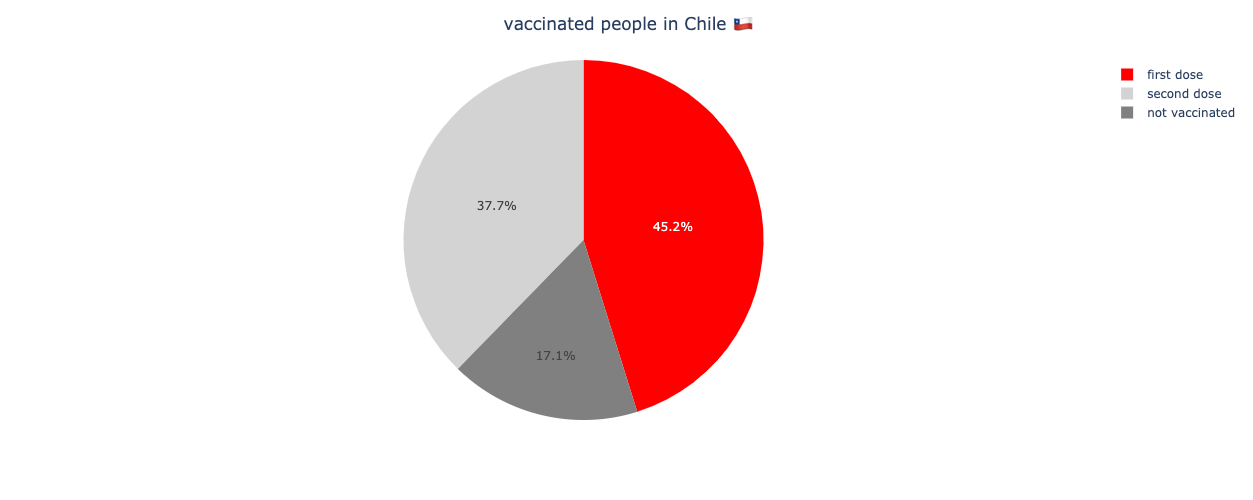

In [35]:
fig_two = px.pie(df_vaccine_percentage_ch, values="percentage",
             names="index", 
             color_discrete_sequence=['red','lightgrey','grey'],width=1000,height=500)
fig_two.update_layout(title_text='vaccinated people in Chile 🇨🇱', title_x=0.5)

Como podemos ver en la gráfica, nos podemos dar cuenta que en el país de chile, el **82,9%** de la población cuenta con una dosis o con ambas dosis, haciendo notar que su proceso de vacunación ha sido muy eficiente, a diferencia de Ecuador en donde solamente el **6%**  de la población esta vacunada, demostrando que el gobierno Ecuatoriano ha sido muy deficiente.

<h3 style="color:darkred"> Comparación del proceso de vacunación de Inglaterra contra Ecuador</h3>

Ahora si bien comparamos con un país de Latinoamérica, debemos realizar una comparación con un país de Europa los cuales tienen un proceso mucho más ordenado y más eficiente, en este caso realizamos un análisis a Inglaterra.

In [36]:
df_vacunas_inglaterra = pd.read_csv('https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newVaccinesGivenByPublishDate%22:%22newVaccinesGivenByPublishDate%22,%22cumVaccinesGivenByPublishDate%22:%22cumVaccinesGivenByPublishDate%22,%22newPeopleVaccinatedFirstDoseByPublishDate%22:%22newPeopleVaccinatedFirstDoseByPublishDate%22,%22cumPeopleVaccinatedFirstDoseByPublishDate%22:%22cumPeopleVaccinatedFirstDoseByPublishDate%22,%22newPeopleVaccinatedSecondDoseByPublishDate%22:%22newPeopleVaccinatedSecondDoseByPublishDate%22,%22cumPeopleVaccinatedSecondDoseByPublishDate%22:%22cumPeopleVaccinatedSecondDoseByPublishDate%22%7D&format=csv')
df_vacunas_inglaterra = df_vacunas_inglaterra[['date','cumPeopleVaccinatedFirstDoseByPublishDate','cumPeopleVaccinatedSecondDoseByPublishDate']]
df_vacunas_inglaterra.columns = ['fecha','primera_dosis','segunda_dosis']
df_vacunas_inglaterra['fecha'] = pd.to_datetime(df_vacunas_inglaterra['fecha'])
df_vacunas_inglaterra['dosis_total'] = df_vacunas_inglaterra['primera_dosis']+df_vacunas_inglaterra['segunda_dosis']
df_vacunas_inglaterra.head()

,fecha,primera_dosis,segunda_dosis,dosis_total
0,2021-05-08,35371669,17669379,53041048
1,2021-05-07,35202642,17230542,52433184
2,2021-05-06,35069641,16764720,51834361
3,2021-05-05,34934171,16291719,51225890
4,2021-05-04,34795074,15887493,50682567


<h4 style="color:orange">Gente vacunada en Inglaterra</h4>

Igualmente como realizamos el proceso en el país de Chile y Ecuador, procedemos a realizar una gráfica del proceso de vacunación del Inglaterra a lo largo del tiempo.

In [37]:
df_vaccine_england = df_vacunas_inglaterra[['fecha','primera_dosis','segunda_dosis']]
df_vaccine_england = df_vaccine_england.groupby(pd.Grouper(key='fecha',freq='W'))[['primera_dosis','segunda_dosis']].max()
df_vaccine_england.head()

,primera_dosis,segunda_dosis
fecha,,
2021-01-10,2286572,391399
2021-01-17,4062501,452301
2021-01-24,6573570,470478
2021-01-31,9296367,494209
2021-02-07,12294006,512581


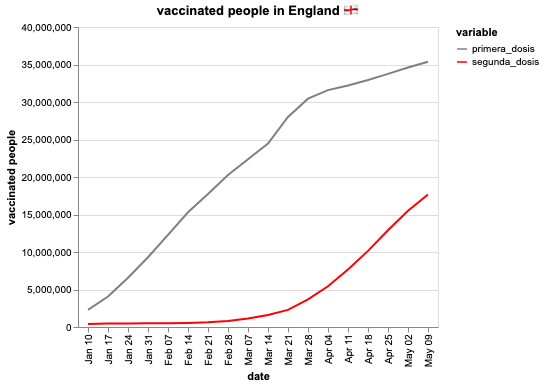

In [38]:
df_vaccine_england.reset_index(inplace=True)
alt.Chart(df_vaccine_england.melt('fecha')).mark_line().encode(
    x=alt.X('monthdate(fecha):O',title='date'),
    y=alt.Y('value:Q',title='vaccinated people'),
    color=alt.Color('variable',scale=alt.Scale(domain=['primera_dosis','segunda_dosis'],range=['grey','red']))
).properties(title='vaccinated people in England 🏴󠁧󠁢󠁥󠁮󠁧󠁿')

Como podemos notar en la gráfica, el cual es muy interesante, vemos que Inglaterra empezo a vacunar desde el 10 de Enero, incluso después de Chile, sin embargo, podemos notar claramente como se ha tenido un proceso tan eficiente que hasta Mayo del presente año tienen vacunado ala mayoría de ciudadanos de su país, en este caso, podriamos decir que el proceso de Inglaterra es eficiente en cuanto al proceso de vacunación de la primera dosis, sin embargo, el proceso de vacunación de la segunda dosis tiene un retraso y existe una gran diferencia entre ambas dosis.

<h4 style="color:orange">Gente vacunada en Inglaterra por Mes</h4>

Como pudimos notar en la anterior gráfica, existe una gran diferencia entre la primera y segunda dosis, por lo cual realizamos un gráfico en donde muestra el proceso de vacunación por mes para cada dosis.

In [39]:
df_vaccine      = df_vacunas_inglaterra.groupby(pd.Grouper(key='fecha',freq='M'))[['primera_dosis','segunda_dosis']].max()
df_vaccine_diff = df_vaccine.diff()
df_vaccine_diff = df_vaccine_diff.fillna(df_vaccine.head(1).to_dict())
df_vaccine_diff.head()

,primera_dosis,segunda_dosis
fecha,,
2021-01-31,"9,296,367.00","494,209.00"
2021-02-28,"10,979,084.00","321,607.00"
2021-03-31,"10,871,993.00","3,697,642.00"
2021-04-30,"3,214,761.00","10,443,855.00"
2021-05-31,"1,009,464.00","2,712,066.00"


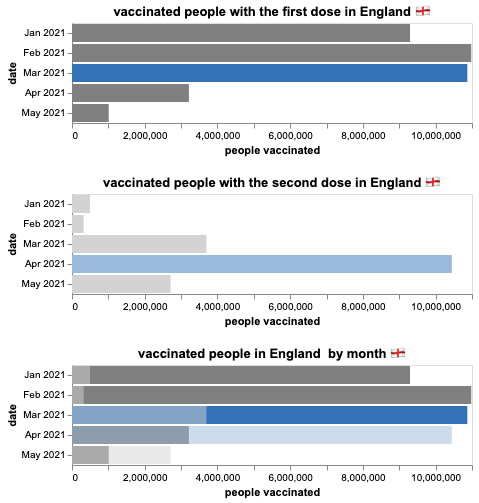

In [40]:
df_vaccine_diff.reset_index(inplace=True)
fig_1=alt.Chart(df_vaccine_diff).mark_bar().encode(
    x=alt.X('primera_dosis:Q',title='people vaccinated'),
    y=alt.Y('yearmonth(fecha):O',title='date'),
    color=alt.condition(
            alt.datum.primera_dosis == 10871993.00,
            alt.value('rgb(51,114,182)'),    
            alt.value('grey')
            ),
).properties(
            height=100,
            title='vaccinated people with the first dose in England 🏴󠁧󠁢󠁥󠁮󠁧󠁿'
)
fig_2=alt.Chart(df_vaccine_diff).mark_bar().encode(
    x=alt.X('segunda_dosis:Q',title='people vaccinated'),
    y=alt.Y('yearmonth(fecha):O',title='date'),
    color=alt.condition(
            alt.datum.segunda_dosis == 10443855.00,
            alt.value('rgb(154,185,219)'),    
            alt.value('lightgrey')
            )
).properties(
            height=100,
            title='vaccinated people with the second dose in England 🏴󠁧󠁢󠁥󠁮󠁧󠁿'
)
(fig_1&fig_2&(fig_1+fig_2.encode(opacity=alt.value(0.5))).properties(title='vaccinated people in England 󠁧󠁢󠁥󠁮󠁧󠁿 by month 🏴󠁧󠁢󠁥󠁮󠁧󠁿')).configure_axis(grid=False)

Como notamos en la gráfica, podemos darnos cuenta que el proceso de vacunación para la priemra dosis ha sido muy eficiente a tal grado que la mayoría de ciudadanos cuentan con la primera dosis, lo malo es que el proceso de la segunda dosis esta atrasado y puede presentar problemas, sin embargo podemos notar que claramente la idea de este país es tener a todos vacunados con la primera dosis a fin de que cuando tengan nuevas vacunas tenerlas listas para la segunda dosis.

<h4 style="color:orange">Porcentaje de personas vacunadas en Inglaterra</h4>

Por ultimo realizamos un gráfico pastel para ver cuantas personas estan vacunadas hasta el momento, obteniendo los siguientes resultados:

In [41]:
df_vaccine_percentage=df_vacunas_inglaterra.sort_values('fecha').iloc[df_vacunas_inglaterra.shape[0]-1].to_dict()
dict_vaccine_percentage={ 'index': ['first dose','second dose','not vaccinated'],
                          'percentage':[df_vaccine_percentage['primera_dosis']/55980000*100,
                                       df_vaccine_percentage['segunda_dosis']/55980000*100,
                                       (55980000-df_vaccine_percentage['dosis_total'])/55980000*100]}
df_vaccine_percentage_en=pd.DataFrame(dict_vaccine_percentage)
df_vaccine_percentage_en

,index,percentage
0,first dose,63.19
1,second dose,31.56
2,not vaccinated,5.25


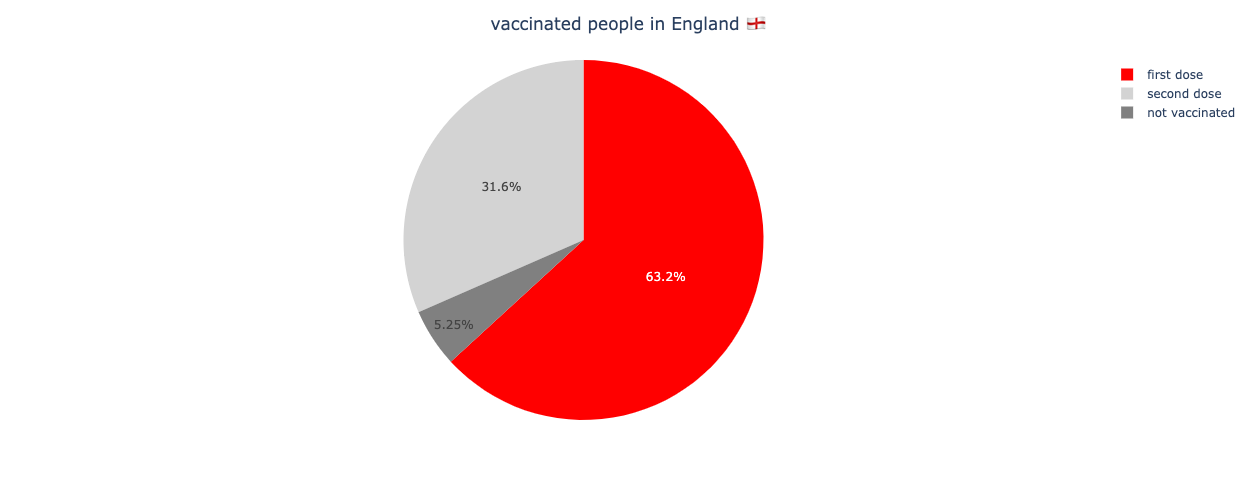

In [617]:
fig_three = px.pie(df_vaccine_percentage_en, values="percentage",
             names="index", 
             color_discrete_sequence=['red','lightgrey','grey'],width=1000,height=500)
fig_three.update_layout(title_text='vaccinated people in England 🏴󠁧󠁢󠁥󠁮󠁧󠁿', title_x=0.5)

Como podemos notar, práctiamente el **94,75%** cuenta con una vacunación, mostrando su alta efectividad en el proceso, incluso mejor que el proceso de vacunación de Chile, sin embargo, podemos notar que el proceso de vacunación de chile con respecto a la segunda vacuna es mejor, no obstante, recordemos la hipotética idea de que Inglaterra primero esta planeando vacunar a la mayoria con la primera dosis para después pasar a la segunda, haciendo que en los siguientes meses su proceso de vacunación para segunda dosis sea mucho mejor.

<h3 style="color:darkred"> Comparación del proceso de vacunación entre Inglaterra, Chile y Ecuador</h3>

Por ultimo realizamos un proceso de comparación entre los tres paises analizados. A cotinuación mostramos los resultados

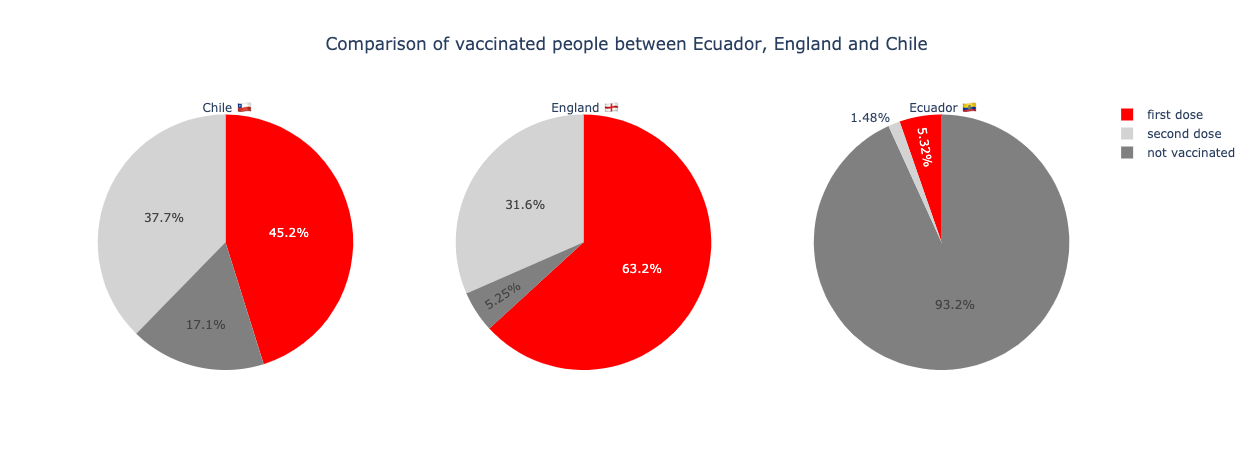

In [44]:
fig = make_subplots(rows=1, cols=3,specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]])
fig.add_trace(go.Pie(labels=df_vaccine_percentage_ch['index'].values, values=df_vaccine_percentage_ch['percentage'].values,
                     marker_colors=['red','lightgrey','grey'],title_text='Chile 🇨🇱'),row=1, col=1)
fig.add_trace(go.Pie(labels=df_vaccine_percentage_en['index'].values, values=df_vaccine_percentage_en['percentage'].values,
                     marker_colors=['red','lightgrey','grey'],title_text='England 🏴󠁧󠁢󠁥󠁮󠁧󠁿'),row=1, col=2)
fig.add_trace(go.Pie(labels=df_vaccine_percentage_ec['index'].values, values=df_vaccine_percentage_ec['percentage'].values,
                     marker_colors=['red','lightgrey','grey'],title_text='Ecuador 🇪🇨'),row=1, col=3)
fig.update_layout(width=1000,title='Comparison of vaccinated people between Ecuador, England and Chile',title_x=0.5)

Como podemos notar en la gráfica, vemos como Ecuador es el país con el peor proceso de vacunación eniendo un **93,2%** de personas sin vacunar, lo cual es muy grave, por otro lado podemos ver como el proceso de vacunación de la segunda dosis de Chile esta más avanzada que en Inglaterra, sin embargo, podemos ver como en Chile, el proceso de la primera dosis es alto. En conclusión, podriamos decir, que sin necesidad de realizar un modelo de regresión, el país que tendría a su población totalmente vacunada seria Inglaterra, después seguiría Chile y por último Ecuador.

-----------------------------

<h2 style="color:yellowgreen">Un modelo de regresión para el proceso de vacunación</h2>

Para este caso, vamos a realiar el modelo de regresión probando dos modelos muy conocidos, uno es el **modelo de regresión Lineal** y el otro es el **modelo de regresión polinomial**. A estos modelos los vamos a entrenar y vamos a analizar cual es el modelo que tiene mejor predicción y escoger el mejor de ellos. Cabe recalcar que el modelo de regresión esta hecho para la **primera dosis** y la **segunda dosis**.

In [1175]:
df_vacunas_inglaterra['country']='Inglaterra'
df_vacunas_chile['country']='Chile'
df_copy_vacunas['country']='Ecuador'
df_final = df_copy_vacunas.append(df_vacunas_chile).append(df_vacunas_inglaterra)
df_final = _obtain_days_from_date(df_final,'fecha','2021-01-01')
df_final = df_final[df_final['fecha']>='2021-01-01']
_save_data(df_final,'datos_vacunas.csv')

In [1176]:
df_final.head()

,fecha,dosis_total,primera_dosis,segunda_dosis,day,country
0,2021-01-21,0.00,0.00,0.00,21,Ecuador
1,2021-01-22,108.00,108.00,0.00,22,Ecuador
2,2021-01-27,"2,982.00","2,982.00",0.00,27,Ecuador
3,2021-02-04,"6,228.00","6,228.00",0.00,35,Ecuador
4,2021-02-17,"8,190.00","6,228.00","1,962.00",48,Ecuador


<h3 style="color:darkred"> Modelo de regresión para Ecuador</h3>

<h4 style="color:orange">Primera dosis</h4>

In [1444]:
df=df_final[df_final['country']=='Ecuador'][['day','primera_dosis']]
features=df.iloc[:,:1].values
target=df.iloc[:,1:2].values

In [1445]:
model_linear_ec_fs = LinearRegression()
model_linear_ec_fs = model_linear_ec_fs.fit(features,target)

In [1446]:
score_ec_linear_fs = model_linear_ec_fs.score(features,target)
print("Linear Score : ",model_linear_ec_fs.score(features,target))

Linear Score :  0.7611930957804309


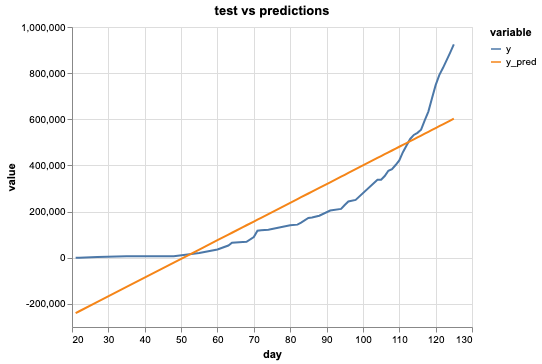

In [1447]:
data_linear_ec_fs=pd.DataFrame({'day':features.reshape(-1),'y':target.reshape(-1),'y_pred':model_linear_ec_fs.predict(features).reshape(-1)})
alt.Chart(data_linear_ec_fs.melt('day')).mark_line().encode(
    x='day',
    y='value',
    color='variable'
).properties(title='test vs predictions').interactive()

In [1504]:
model_poly_ec_fs = np.poly1d(np.polyfit(features.reshape(-1), target.reshape(-1), 4))
#model_poly_ec_fs = model_poly_ec_fs.fit(features,target)

In [1709]:
score_ec_poly_fs = mean_squared_error(target,model_poly.predict(features))/1000000000000
print("Poly Score : ",mean_squared_error(target,model_poly.predict(features))/1000000000000)

Poly Score :  3.406803858425674


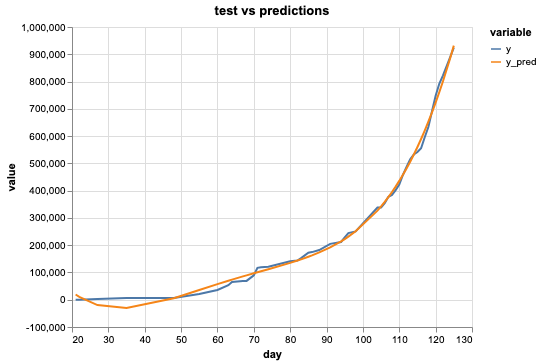

In [1505]:
data_poly_ec_fs=pd.DataFrame({'day':features.reshape(-1),'y':target.reshape(-1),'y_pred':model_poly_ec_fs(features.reshape(-1))})
alt.Chart(data_poly_ec_fs.melt('day')).mark_line().encode(
    x='day',
    y='value',
    color='variable'
).properties(title='test vs predictions').interactive()

<h4 style="color:orange">Segunda dosis</h4>

In [1377]:
df=df_final[df_final['country']=='Ecuador'][['day','segunda_dosis']]
features=df.iloc[:,:1].values
target=df.iloc[:,1:2].values

In [1378]:
model_linear_ec_ds = LinearRegression()
model_linear_ec_ds = model_linear_ec_ds.fit(features,target)

In [1379]:
score_ec_linear_ds = model_linear_ec_ds.score(features,target)
print("Linear Score : ",model_linear_ec_ds.score(features,target))

Linear Score :  0.8292522681365517


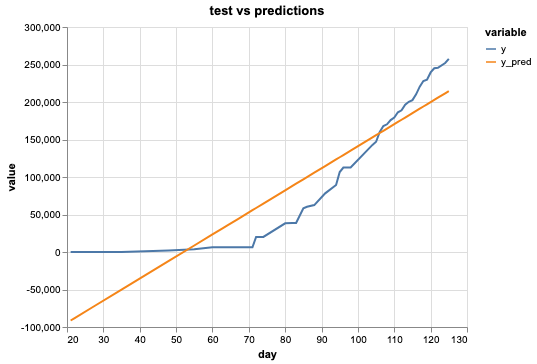

In [1380]:
data_linear_ec_ds=pd.DataFrame({'day':features.reshape(-1),'y':target.reshape(-1),'y_pred':model_linear_ec_ds.predict(features).reshape(-1)})
alt.Chart(data_linear_ec_ds.melt('day')).mark_line().encode(
    x='day',
    y='value',
    color='variable'
).properties(title='test vs predictions').interactive()

In [1381]:
model_poly_ec_ds = Pipeline([('poly', PolynomialFeatures(degree=6)),
                         ('linear', LinearRegression(fit_intercept=True))])
model_poly_ec_ds = model_poly_ec_ds.fit(features,target)

In [1382]:
score_ec_poly_ds=model_poly_ec_ds.score(features,target)
print("Poly Score : ",model_poly_ec_ds.score(features,target))

Poly Score :  0.9983667812905402


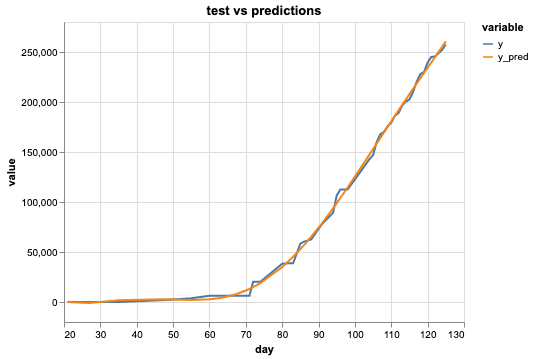

In [1383]:
data_poly_ec_ds=pd.DataFrame({'day':features.reshape(-1),'y':target.reshape(-1),'y_pred':model_poly_ec_ds.predict(features).reshape(-1)})
alt.Chart(data_poly_ec_ds.melt('day')).mark_line().encode(
    x='day',
    y='value',
    color='variable'
).properties(title='test vs predictions').interactive()

<h3 style="color:darkred"> Modelo de regresión para Chile</h3>

<h4 style="color:orange">Primera dosis</h4>

In [1384]:
df=df_final[df_final['country']=='Chile'][['day','primera_dosis']]
features=df.iloc[:,:1].values
target=df.iloc[:,1:2].values

In [1385]:
model_linear_ch_fs = LinearRegression()
model_linear_ch_fs = model_linear_ch_fs.fit(features,target)

In [1386]:
score_ch_linear_fs = model_linear_ch_fs.score(features,target)
print("Linear Score : ",model_linear_ch_fs.score(features,target))

Linear Score :  0.9669411570589734


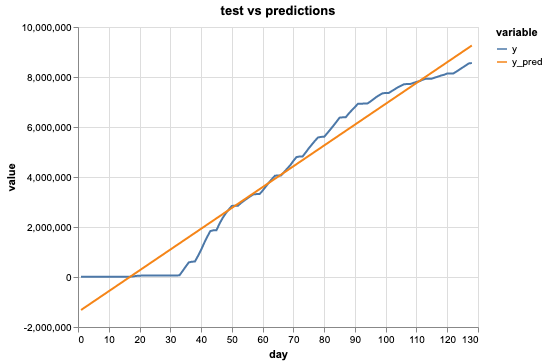

In [1387]:
data_linear_ch_fs=pd.DataFrame({'day':features.reshape(-1),'y':target.reshape(-1),'y_pred':model_linear_ch_fs.predict(features).reshape(-1)})
alt.Chart(data_linear_ch_fs.melt('day')).mark_line().encode(
    x='day',
    y='value',
    color='variable'
).properties(title='test vs predictions').interactive()

In [1391]:
model_poly_ch_fs = Pipeline([('poly', PolynomialFeatures(degree=5)),
                         ('linear', LinearRegression(fit_intercept=True))])
model_poly_ch_fs = model_poly_ch_fs.fit(features,target)

In [1392]:
score_ch_poly_fs = model_poly_ch_fs.score(features,target)
print("Poly Score : ",model_poly_ch_fs.score(features,target))

Poly Score :  0.9965269098950716


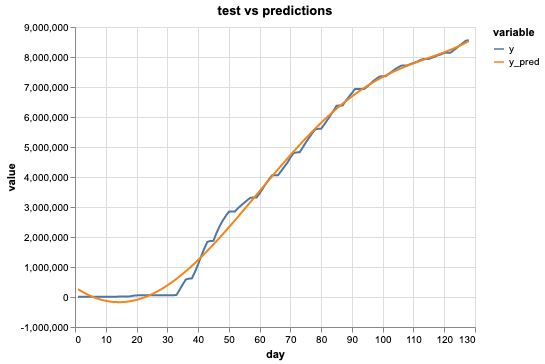

In [1393]:
data_poly_ch_fs=pd.DataFrame({'day':features.reshape(-1),'y':target.reshape(-1),'y_pred':model_poly_ch_fs.predict(features).reshape(-1)})
alt.Chart(data_poly_ch_fs.melt('day')).mark_line().encode(
    x='day',
    y='value',
    color='variable'
).properties(title='test vs predictions').interactive()

<h4 style="color:orange">Segunda dosis</h4>

In [1394]:
df=df_final[df_final['country']=='Chile'][['day','segunda_dosis']]
features=df.iloc[:,:1].values
target=df.iloc[:,1:2].values

In [1395]:
model_linear_ch_ds = LinearRegression()
model_linear_ch_ds = model_linear_ch_ds.fit(features,target)

In [1396]:
score_ch_linear_ds = model_linear_ch_ds.score(features,target)
print("Linear Score : ",model_linear_ch_ds.score(features,target))

Linear Score :  0.8561709404004942


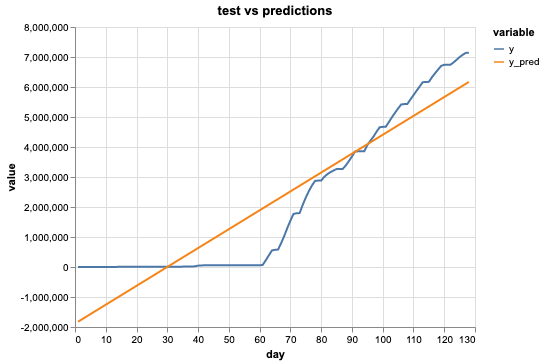

In [1397]:
data_linear_ch_ds=pd.DataFrame({'day':features.reshape(-1),'y':target.reshape(-1),'y_pred':model_linear_ch_ds.predict(features).reshape(-1)})
alt.Chart(data_linear_ch_ds.melt('day')).mark_line().encode(
    x='day',
    y='value',
    color='variable'
).properties(title='test vs predictions').interactive()

In [1398]:
model_poly_ch_ds = Pipeline([('poly', PolynomialFeatures(degree=6)),
                         ('linear', LinearRegression(fit_intercept=True))])
model_poly_ch_ds = model_poly_ch_ds.fit(features,target)

In [1399]:
score_ch_poly_ds = model_poly_ch_ds.score(features,target)
print("Poly Score : ",model_poly_ch_ds.score(features,target))

Poly Score :  0.9936252487515009


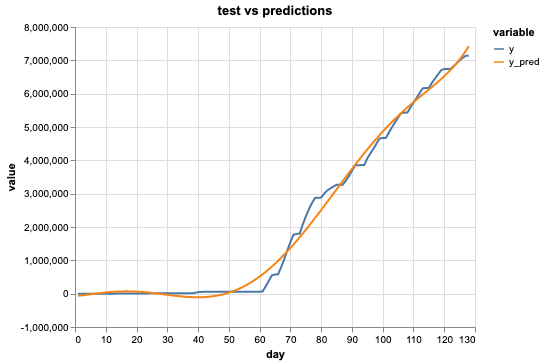

In [1400]:
data_poly_ch_ds = pd.DataFrame({'day':features.reshape(-1),'y':target.reshape(-1),'y_pred':model_poly_ch_ds.predict(features).reshape(-1)})
alt.Chart(data_poly_ch_ds.melt('day')).mark_line().encode(
    x='day',
    y='value',
    color='variable'
).properties(title='test vs predictions').interactive()

<h3 style="color:darkred"> Modelo de regresión para Inglaterra</h3>

<h4 style="color:orange">Primera dosis</h4>

In [1401]:
df=df_final[df_final['country']=='Inglaterra'][['day','primera_dosis']]
features=df.iloc[:,:1].values
target=df.iloc[:,1:2].values

In [1402]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [1403]:
model_linear_en_fs = LinearRegression()
model_linear_en_fs = model_linear_en_fs.fit(features,target)

In [1404]:
score_en_linear_fs = model_linear_en_fs.score(features,target)
print("Linear Score : ",model_linear_en_fs.score(features,target))

Linear Score :  0.9667243111015937


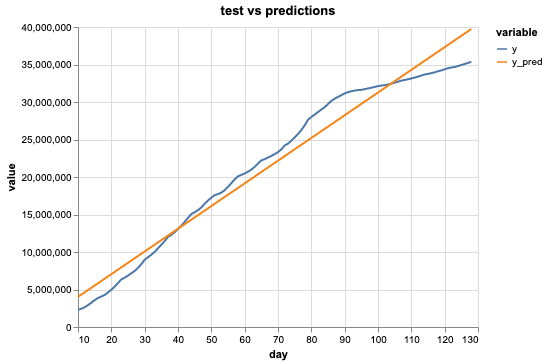

In [1405]:
data_linear_en_fs = pd.DataFrame({'day':features.reshape(-1),'y':target.reshape(-1),'y_pred':model_linear_en_fs.predict(features).reshape(-1)})
alt.Chart(data_linear_en_fs.melt('day')).mark_line().encode(
    x='day',
    y='value',
    color='variable'
).properties(title='test vs predictions').interactive()

In [1406]:
model_poly_en_fs = Pipeline([('poly', PolynomialFeatures(degree=6)),
                        ('linear', LinearRegression(fit_intercept=True))])
model_poly_en_fs = model_poly_en_fs.fit(features,target)

In [1407]:
score_en_poly_fs = model_poly_en_fs.score(features,target)
print("Poly Score : ",model_poly_en_fs.score(features,target))

Poly Score :  0.9989307862471187


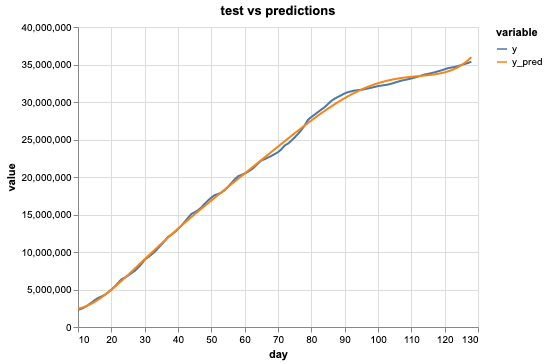

In [1408]:
data_poly_en_fs = pd.DataFrame({'day':features.reshape(-1),'y':target.reshape(-1),'y_pred':model_poly_en_fs.predict(features).reshape(-1)})
alt.Chart(data_poly_en_fs.melt('day')).mark_line().encode(
    x='day',
    y='value',
    color='variable'
).properties(title='test vs predictions').interactive()

<h4 style="color:orange">Segunda dosis</h4>

In [1409]:
df=df_final[df_final['country']=='Inglaterra'][['day','segunda_dosis']]
features=df.iloc[:,:1].values
target=df.iloc[:,1:2].values

In [1410]:
model_linear_en_ds = LinearRegression()
model_linear_en_ds = model_linear_en_ds.fit(features,target)

In [1411]:
score_en_linear_ds = model_linear_en_ds.score(features,target)
print("Linear Score : ",model_linear_en_ds.score(features,target))

Linear Score :  0.7522278275852885


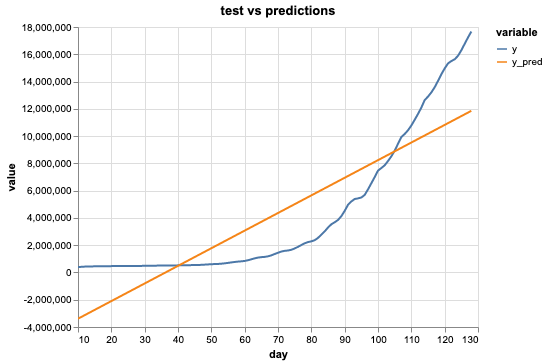

In [1412]:
data_linear_en_ds = pd.DataFrame({'day':features.reshape(-1),'y':target.reshape(-1),'y_pred':model_linear_en_ds.predict(features).reshape(-1)})
alt.Chart(data_linear_en_ds.melt('day')).mark_line().encode(
    x='day',
    y='value',
    color='variable'
).properties(title='test vs predictions').interactive()

In [1413]:
model_poly_en_ds = Pipeline([('poly', PolynomialFeatures(degree=9)),
                        ('linear', LinearRegression(fit_intercept=True))])
model_poly_en_ds = model_poly_en_ds.fit(features,target)

In [1414]:
score_en_poly_ds = model_poly_en_ds.score(features,target)
print("Poly Score : ",model_poly_en_ds.score(features,target))

Poly Score :  0.9995948902007117


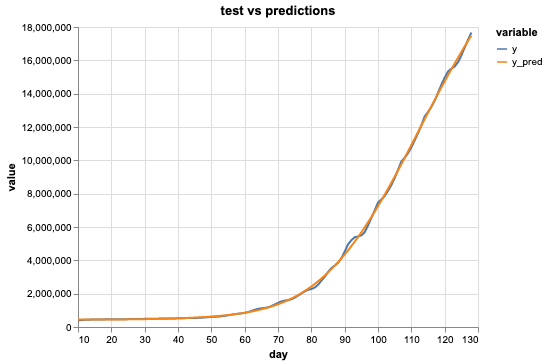

In [1415]:
data_poly_en_ds = pd.DataFrame({'day':features.reshape(-1),'y':target.reshape(-1),'y_pred':model_poly_en_ds.predict(features).reshape(-1)})
alt.Chart(data_poly_en_ds.melt('day')).mark_line().encode(
    x='day',
    y='value',
    color='variable'
).properties(title='test vs predictions').interactive()

------------------------------------------------

<h2 style="color:yellowgreen">Análisis de los modelos de regresión</h2>

Una vez ejecutados todos los modelos, procedemos a realiar un análisis de cada uno de ellos obtiendo los siguientes resultados

In [1714]:
dict_results = {'country':['Ecuador','Chile','Inglaterra'],
               'linear_fd':[score_ec_linear_fs,score_ch_linear_fs,score_en_linear_fs],
               'poly_fd':[score_ec_poly_fs,score_ch_poly_fs,score_en_poly_fs],
               'linear_sd':[score_ec_linear_ds,score_ch_linear_ds,score_en_linear_ds],
               'poly_sd':[score_ec_poly_ds,score_ch_poly_ds,score_en_poly_ds]}
df_results = pd.DataFrame(dict_results)

In [1715]:
df_results

,country,linear_fd,poly_fd,linear_sd,poly_sd
0,Ecuador,0.76,3.41,0.83,1.00
1,Chile,0.97,1.00,0.86,0.99
2,Inglaterra,0.97,1.00,0.75,1.00


Como podemos notar en la tabla, el modelo polinomial es el que mejor se ha acoplado a los datos de los tres países tanto para la primera dosis como para la segunda dosis, por lo tanto, los experimentos seran realizados con el **modelo polinomial**. Recordemos que este modelo se ajusta a **LOS DATOS** ya que los modelos dependen mucho de ello, la ventaja del modelo polinomial es que al tener una curva más suavizada se logra una mejor predicción, mientras que el modelo de regresión lineal como su nombre o dice es lineal y es una recta en la cual sufre la desventaja de que si la linea se ajusta bajo los datos, se logran predicciones bajas y si se ajusta sobre los datos se logran predicciones muy altas, es decir, se llegan a extremos, por lo tanto no es una buena opción si es que no sabemos si nuestros datos seran altamente crecientes. **OJO:** Para el modelo polinomial de ecuador, tomamos en cuenta la métrica MSE

-----------------------------------

<h2 style="color:yellowgreen">Experimentos</h2>

Para los experimentos, empezaremos desde el día 2021-05-09 que sería el día 160 a partir del 2021-01-01, a partir de ello empezaremos a relizar tres meses de predicción para Ecuador y dos para los otros paises

In [1418]:
df_final[df_final['fecha']=='2021-05-08']

,fecha,dosis_total,primera_dosis,segunda_dosis,day,country
136,2021-05-08,"15,703,842.00","8,559,854.00","7,143,988.00",128,Chile
0,2021-05-08,"53,041,048.00","35,371,669.00","17,669,379.00",128,Inglaterra


In [1527]:
inicio = datetime(2021,5,9)
fin    = datetime(2021,8,9)
lista_fechas = [(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin - inicio).days + 1)]
datos = [i for i in range(129,128+len(lista_fechas)+1)]

<h3 style="color:darkred"> Ecuador 🇪🇨</h3>

<h4 style="color:orange">Primera dosis</h4>

In [1685]:
dictionary_ec={'fecha':lista_fechas,
            'linear_fd_ec':model_linear_ec_fs.predict(np.array(datos).reshape(len(datos),-1)).reshape(-1),
            'poly_fd_ec':model_poly_ec_fs(np.array(datos).reshape(-1)),}
df_ec=pd.DataFrame(dictionary_ec)
df_ec['fecha']=pd.to_datetime(df_ec['fecha'])
df_ec=df_ec.groupby(pd.Grouper(key='fecha',freq='5D')).max()

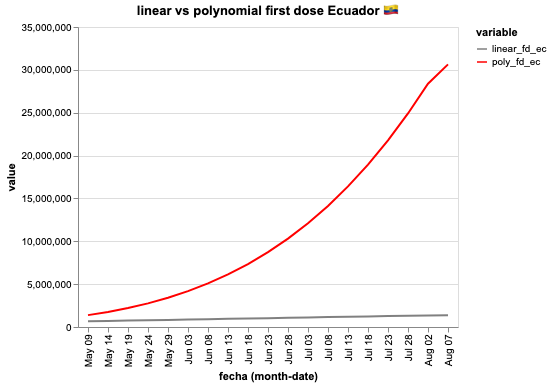

In [1686]:
df_ec=df_ec.reset_index()
alt.Chart(df_ec.reset_index().melt('fecha')).mark_line().encode(
    x='monthdate(fecha):N',
    y=alt.Y('value:Q'),
    color=alt.Color('variable',scale=alt.Scale(domain=['linear_fd_ec','poly_fd_ec'],range=['grey','red']))
).properties(title='linear vs polynomial first dose Ecuador 🇪🇨')


**Fecha corte de Ecuador para la priemra dosis**

In [1687]:
df_ec[df_ec['fecha']=='2021-07-18']

,fecha,linear_fd_ec,poly_fd_ec
14,2021-07-18,"1,234,304.29","18,942,577.29"


<h4 style="color:orange">Segunda dosis</h4>

In [1718]:
dictionary_ec={'fecha':lista_fechas,
            'linear_sd_ec':model_linear_ec_ds.predict(np.array(datos).reshape(len(datos),-1)).reshape(-1),
            'poly_sd_ec':model_poly_ec_ds.predict(np.array(datos).reshape(len(datos),-1)).reshape(-1),}
df_ec=pd.DataFrame(dictionary_ec)
df_ec['fecha']=pd.to_datetime(df_ec['fecha'])
df_ec=df_ec.groupby(pd.Grouper(key='fecha',freq='5D')).max()

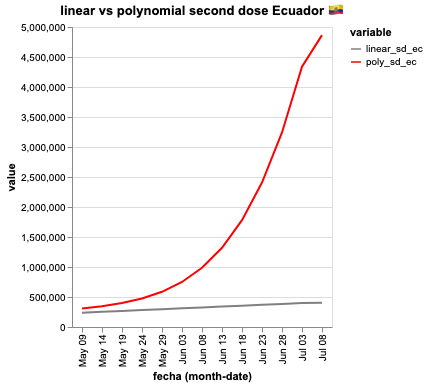

In [1719]:
df_ec=df_ec.reset_index()
alt.Chart(df_ec.melt('fecha')).mark_line().encode(
    x='monthdate(fecha):N',
    y=alt.Y('value:Q'),
    color=alt.Color('variable',scale=alt.Scale(domain=['linear_sd_ec','poly_sd_ec'],range=['grey','red']))
).properties(title='linear vs polynomial second dose Ecuador 🇪🇨')


**Fecha corte de Ecuador para la segunda dosis**

In [1696]:
df_ec[df_ec['fecha']=='2021-08-02']

,index,fecha,linear_sd_ec,poly_sd_ec
17,17,2021-08-02,"488,126.87","20,526,403.67"


Con este análisis podemos ver que el Ecuador acabara de ser vacunado en dos fechas, para la primera dosis se dara el **2021-07-08** y para la segunda dosis sera el **2021-08-02** tomando en cuenta los datos anteriores. Con ello podriamos decir que el proceso de la vacunación avanzara rapido con el nuevo gobierno. Ahora solamente veremos el proceso de vacunación para el resto de paises utilizando el modelo polinomial que es el que mejor resultados ha dado

<h3 style="color:darkred"> Chile 🇨🇱 e Inglaterra 🏴󠁧󠁢󠁥󠁮󠁧󠁿</h3>

In [1743]:
inicio = datetime(2021,5,9)
fin    = datetime(2021,7,10)
lista_fechas = [(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin - inicio).days + 1)]
datos = [i for i in range(129,128+len(lista_fechas)+1)]

<h4 style="color:orange">Primera dosis</h4>

In [1754]:
dictionary_ce={'fecha':lista_fechas,
            'chile':model_poly_ch_fs.predict(np.array(datos).reshape(len(datos),-1)).reshape(-1),
            'inglaterra':model_poly_en_fs.predict(np.array(datos).reshape(len(datos),-1)).reshape(-1)}
df_ce=pd.DataFrame(dictionary_ce)
df_ce['fecha']=pd.to_datetime(df_ce['fecha'])
df_ce=df_ce.groupby(pd.Grouper(key='fecha',freq='2D')).max()

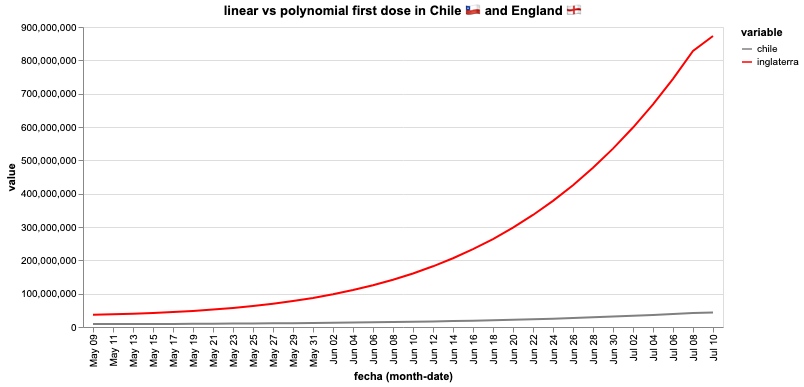

In [1763]:
df_ce=df_ce.reset_index()
alt.Chart(df_ce.melt('fecha')).mark_line().encode(
    x='monthdate(fecha):N',
    y=alt.Y('value:Q'),
    color=alt.Color('variable',scale=alt.Scale(domain=['chile','inglaterra'],range=['grey','red']))
).properties(title='linear vs polynomial first dose in Chile 🇨🇱 and England 🏴󠁧󠁢󠁥󠁮󠁧󠁿')


**Fecha corte de Chile para la priemra dosis**

In [1762]:
df_ce[df_ce['fecha']=='2021-06-18'][['fecha','chile']]

,fecha,chile
20,2021-06-18,"20,277,009.96"


**Fecha corte de Inglaterra para la primera dosis**

In [1761]:
df_ce[df_ce['fecha']=='2021-05-23'][['fecha','inglaterra']]

,fecha,inglaterra
7,2021-05-23,"57,193,821.28"


<h4 style="color:orange">Segunda dosis</h4>

In [1789]:
inicio = datetime(2021,5,9)
fin    = datetime(2021,6,7)
lista_fechas = [(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin - inicio).days + 1)]
datos = [i for i in range(129,128+len(lista_fechas)+1)]

In [1790]:
dictionary_ce={'fecha':lista_fechas,
            'chile':model_poly_ch_ds.predict(np.array(datos).reshape(len(datos),-1)).reshape(-1),
            'inglaterra':model_poly_en_ds.predict(np.array(datos).reshape(len(datos),-1)).reshape(-1)}
df_ce=pd.DataFrame(dictionary_ce)
df_ce['fecha']=pd.to_datetime(df_ce['fecha'])
df_ce=df_ce.groupby(pd.Grouper(key='fecha',freq='1D')).max()

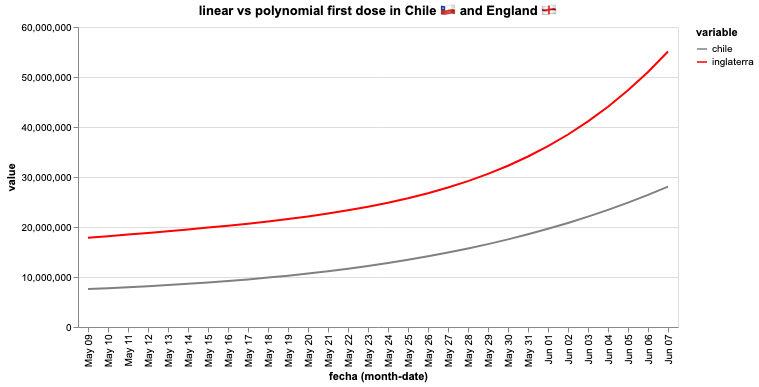

In [1791]:
df_ce=df_ce.reset_index()
alt.Chart(df_ce.melt('fecha')).mark_line().encode(
    x='monthdate(fecha):N',
    y=alt.Y('value:Q'),
    color=alt.Color('variable',scale=alt.Scale(domain=['chile','inglaterra'],range=['grey','red']))
).properties(title='linear vs polynomial first dose in Chile 🇨🇱 and England 🏴󠁧󠁢󠁥󠁮󠁧󠁿')


**Fecha corte de Chile para la segunda dosis**

In [1793]:
df_ce[df_ce['fecha']=='2021-06-01'][['fecha','chile']]

,fecha,chile
23,2021-06-01,"19,639,587.87"


**Fecha corte de Inglaterra para la segunda dosis**

In [1794]:
df_ce[df_ce['fecha']=='2021-06-07'][['fecha','inglaterra']]

,fecha,inglaterra
29,2021-06-07,"55,102,175.47"


-------------------------------------

<h2 style="color:yellowgreen">Conclusiones</h2>

Mediante esta prueba, hemos podido realizar un análisis extenso del proceso de vacunación que ha tenido la población Ecuatoriana y a su vez hemos comparado dicho proceso con el resto de paises del mundo dando a notar el pobre e ineficiente proceso de vacunación que lleva el gobierno Ecuatoriano actualmente. Sin embargo, podemos ver que mediante las predicciones, la mayoría de gente podría estar vacunada en fechas de Julio a Agosto en nuestro País, mientras que en los paises comparados en este informe vemos que la población total podra ser vacunada hasta el siguiente mes

------------------------------

<h2 style="color:yellowgreen">Recomendaciones</h2>

Se recomienda utilizar el conjunto de datos que se tiene en este cuaderno puesto que dichos datos estan actualizados y tienen una fuente fiable, en especial el de Inglaterra. De la misma manera sería muy bueno buscar la cantidad de personas vacundas dependiendo de las vacunas con la finalidad de llevar una mejor cuenta de las vacunas que existan por fabricante y así poder realizar mejores análisis.